# Binder selection, compute humanness, merge all files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bindcraft = pd.read_csv('bindcraft_passed-bindcraft_metrics.csv')

rf3 = pd.read_csv('bindcraft_passed-rf3template_metrics.csv')
rf3.rename(columns={'example_id': 'Design'}, inplace=True)
rf3['Design'] = rf3['Design'].str.rsplit('_',n=1).str[0]

px = pd.read_csv('../proteinx/protenix_ipsaemax_actifiptm_lis.txt', sep=" ")
px.rename(columns={'name': 'Design'}, inplace=True)
px['Design'] = px['Design'].str.rsplit('_',n=2).str[0]
px['Design'] = "gpc3_out_1_" + px['Design']

df = pd.merge(bindcraft, rf3, on='Design', how='outer')
df = pd.merge(df, px, on='Design', how='outer')
df['rf3_iptm'] = df[['iptm.iptm_0','iptm.iptm_1','iptm.iptm_2','iptm.iptm_3','iptm.iptm_4']].mean(axis=1)

In [3]:
from promb import init_db
db = init_db('human-reference',9)


              *           █
▄▄▄▄    ▄▄▄  ▄█▄   ▄▄▄▄   █▄▄▄  
█   █  █    █▓███  █ █ █  █   █ 
█▄▄▄▀  █    ▀███▀  █   █  █▄▄▄▀ 
█                              
▀  protein mutation burden v1.0.2
                                
Loading promb database to memory...


Database (~11M peptides, <512 MB) loaded in 7s.


In [4]:
humanness_scores = []
for seq in df['Sequence']:
    score = db.compute_peptide_content(seq)
    humanness_scores.append(score)
      
df['humanness_score'] = humanness_scores

In [26]:
rosetta_rf3_metrics = pd.read_csv('rosetta_rf3_metrics.csv') 
rosetta_af2_metrics = pd.read_csv('rosetta_af2_metrics.csv')
rosetta_px_metrics = pd.read_csv('../proteinx/rosetta_px_metrics.csv')

rmsds_rf3_af2 = pd.read_csv('rmsds.txt', sep='\t')
rmsds_px_af2 = pd.read_csv( '../proteinx/rmsds.txt', sep='\t')

rosetta_rf3_metrics.rename(columns={'binder_id': 'Design'}, inplace=True)
rosetta_rf3_metrics['Design'] = rosetta_rf3_metrics['Design'].str.rsplit('_',n=3).str[0]

rosetta_af2_metrics.rename(columns={'binder_id': 'Design'}, inplace=True)
rosetta_af2_metrics['Design'] = rosetta_af2_metrics['Design'].str.rsplit('_',n=1).str[0]

rosetta_px_metrics.rename(columns={'binder_id': 'Design'}, inplace=True)
rosetta_px_metrics['Design'] = rosetta_px_metrics['Design'].str.rsplit('_',n=2).str[0]
rosetta_px_metrics['Design'] = "gpc3_out_1_" + rosetta_px_metrics['Design']

rmsds_rf3_af2.rename(columns={'Name': 'Design'}, inplace=True)
rmsds_rf3_af2.rename(columns={'Binder_bb': 'rf3_Binder_bb'}, inplace=True)
rmsds_rf3_af2.rename(columns={'Target_aligned_Binder_bb': 'rf3_Target_aligned_Binder_bb'}, inplace=True)
rmsds_rf3_af2['Design'] = rmsds_rf3_af2['Design'].str.rsplit('_',n=1).str[0]

rmsds_px_af2.rename(columns={'Name': 'Design'}, inplace=True)
rmsds_px_af2.rename(columns={'Binder_bb': 'px_Binder_bb'}, inplace=True)
rmsds_px_af2.rename(columns={'Target_aligned_Binder_bb': 'px_Target_aligned_Binder_bb'}, inplace=True)
rmsds_px_af2['Design'] = "gpc3_out_1_" + rmsds_px_af2['Design']

In [30]:
master = pd.merge(df, rosetta_rf3_metrics, on='Design', how='outer')
master = pd.merge(master, rosetta_af2_metrics, on='Design', how='outer')
master = pd.merge(master, rosetta_px_metrics, on='Design', how='outer')

master = pd.merge(master, rmsds_rf3_af2, on='Design', how='outer')
master = pd.merge(master, rmsds_px_af2, on='Design', how='outer')

top_iptm_designs = master.sort_values(by=['Average_i_pTM'], ascending=False) # sorting as per AF2 ipTM

In [33]:
key_metrics = [
    'Design',
    'Length',
    'Helicity',
    'MPNN_score',
    'MPNN_seq_recovery',
    'Average_pLDDT',
    'Average_pTM',
    'Average_i_pTM',
    'Average_pAE',
    'Average_i_pAE',
    'Average_i_pLDDT',
    'Average_ss_pLDDT',
    'Average_Unrelaxed_Clashes',
    'Average_Relaxed_Clashes',
    'Average_Binder_Energy_Score',
    'Average_Surface_Hydrophobicity',
    'Average_ShapeComplementarity',
    'Average_PackStat',
    'Average_dG',
    'Average_dSASA',
    'Average_dG/dSASA',
    'Average_n_InterfaceResidues',
    'Average_Binder_pLDDT',
    'Average_Binder_pTM',
    'Average_Binder_pAE',
    'Average_Binder_RMSD',
    'af2_sap_binder',
    'af2_distbased_intf_res_binder',
    'af2_distbased_intf_res_target',
    'rf3_iptm',
    'rf3_rosetta_interface_sc',
    'rf3_rosetta_interface_dSASA',
    'rf3_rosetta_interface_dG',
    'rf3_rosetta_interface_dG_dSASA_ratio',
    'rf3_sap_binder',
    'rf3_distbased_intf_res_binder',
    'rf3_distbased_intf_res_target',
    'rf3_Binder_bb',
    'rf3_Target_aligned_Binder_bb',
    'px_ipsae_max',
    'px_actif_iptm',
    'px_LIS',
    'px_rosetta_interface_sc',
    'px_rosetta_interface_dSASA',
    'px_rosetta_interface_dG',
    'px_rosetta_interface_dG_dSASA_ratio',
    'px_sap_binder',
    'px_distbased_intf_res_binder',
    'px_distbased_intf_res_target',
    'px_Binder_bb',
    'px_Target_aligned_Binder_bb',
    'humanness_score',
    'Sequence'
]

top_iptm_designs_key_metrics = top_iptm_designs[key_metrics]
top_iptm_designs_key_metrics.to_csv('top_iptm_designs_key_metrics_minibinders.csv', index=False, header=True)

In [34]:
described_metrics = top_iptm_designs_key_metrics.describe().T.round(2)
described_metrics.to_csv('top_iptm_designs_key_metrics_described.tsv', sep='\t')
described_metrics

,count,mean,std,min,25%,50%,75%,max
Length,79.0,107.10,28.52,61.00,80.00,115.00,130.00,149.00
Helicity,79.0,-0.30,0.00,-0.30,-0.30,-0.30,-0.30,-0.30
MPNN_score,79.0,0.97,0.10,0.78,0.90,0.96,1.02,1.21
MPNN_seq_recovery,79.0,0.41,0.07,0.22,0.36,0.41,0.45,0.54
Average_pLDDT,79.0,0.89,0.02,0.84,0.87,0.89,0.90,0.94
Average_pTM,79.0,0.89,0.01,0.88,0.89,0.89,0.90,0.91
Average_i_pTM,79.0,0.86,0.03,0.78,0.84,0.86,0.88,0.92
Average_pAE,79.0,0.23,0.03,0.17,0.22,0.23,0.25,0.28
Average_i_pAE,79.0,0.27,0.03,0.20,0.24,0.27,0.29,0.32
Average_i_pLDDT,79.0,0.88,0.03,0.79,0.86,0.88,0.90,0.94


# Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_iptm_designs_key_metrics = pd.read_csv('top_iptm_designs_key_metrics_minibinders.csv')

In [2]:
described_metrics = top_iptm_designs_key_metrics.describe().T.round(2)
described_metrics

,count,mean,std,min,25%,50%,75%,max
Length,79.0,107.10,28.52,61.00,80.00,115.00,130.00,149.00
Helicity,79.0,-0.30,0.00,-0.30,-0.30,-0.30,-0.30,-0.30
MPNN_score,79.0,0.97,0.10,0.78,0.90,0.96,1.02,1.21
MPNN_seq_recovery,79.0,0.41,0.07,0.22,0.36,0.41,0.45,0.54
Average_pLDDT,79.0,0.89,0.02,0.84,0.87,0.89,0.90,0.94
Average_pTM,79.0,0.89,0.01,0.88,0.89,0.89,0.90,0.91
Average_i_pTM,79.0,0.86,0.03,0.78,0.84,0.86,0.88,0.92
Average_pAE,79.0,0.23,0.03,0.17,0.22,0.23,0.25,0.28
Average_i_pAE,79.0,0.27,0.03,0.20,0.24,0.27,0.29,0.32
Average_i_pLDDT,79.0,0.88,0.03,0.79,0.86,0.88,0.90,0.94


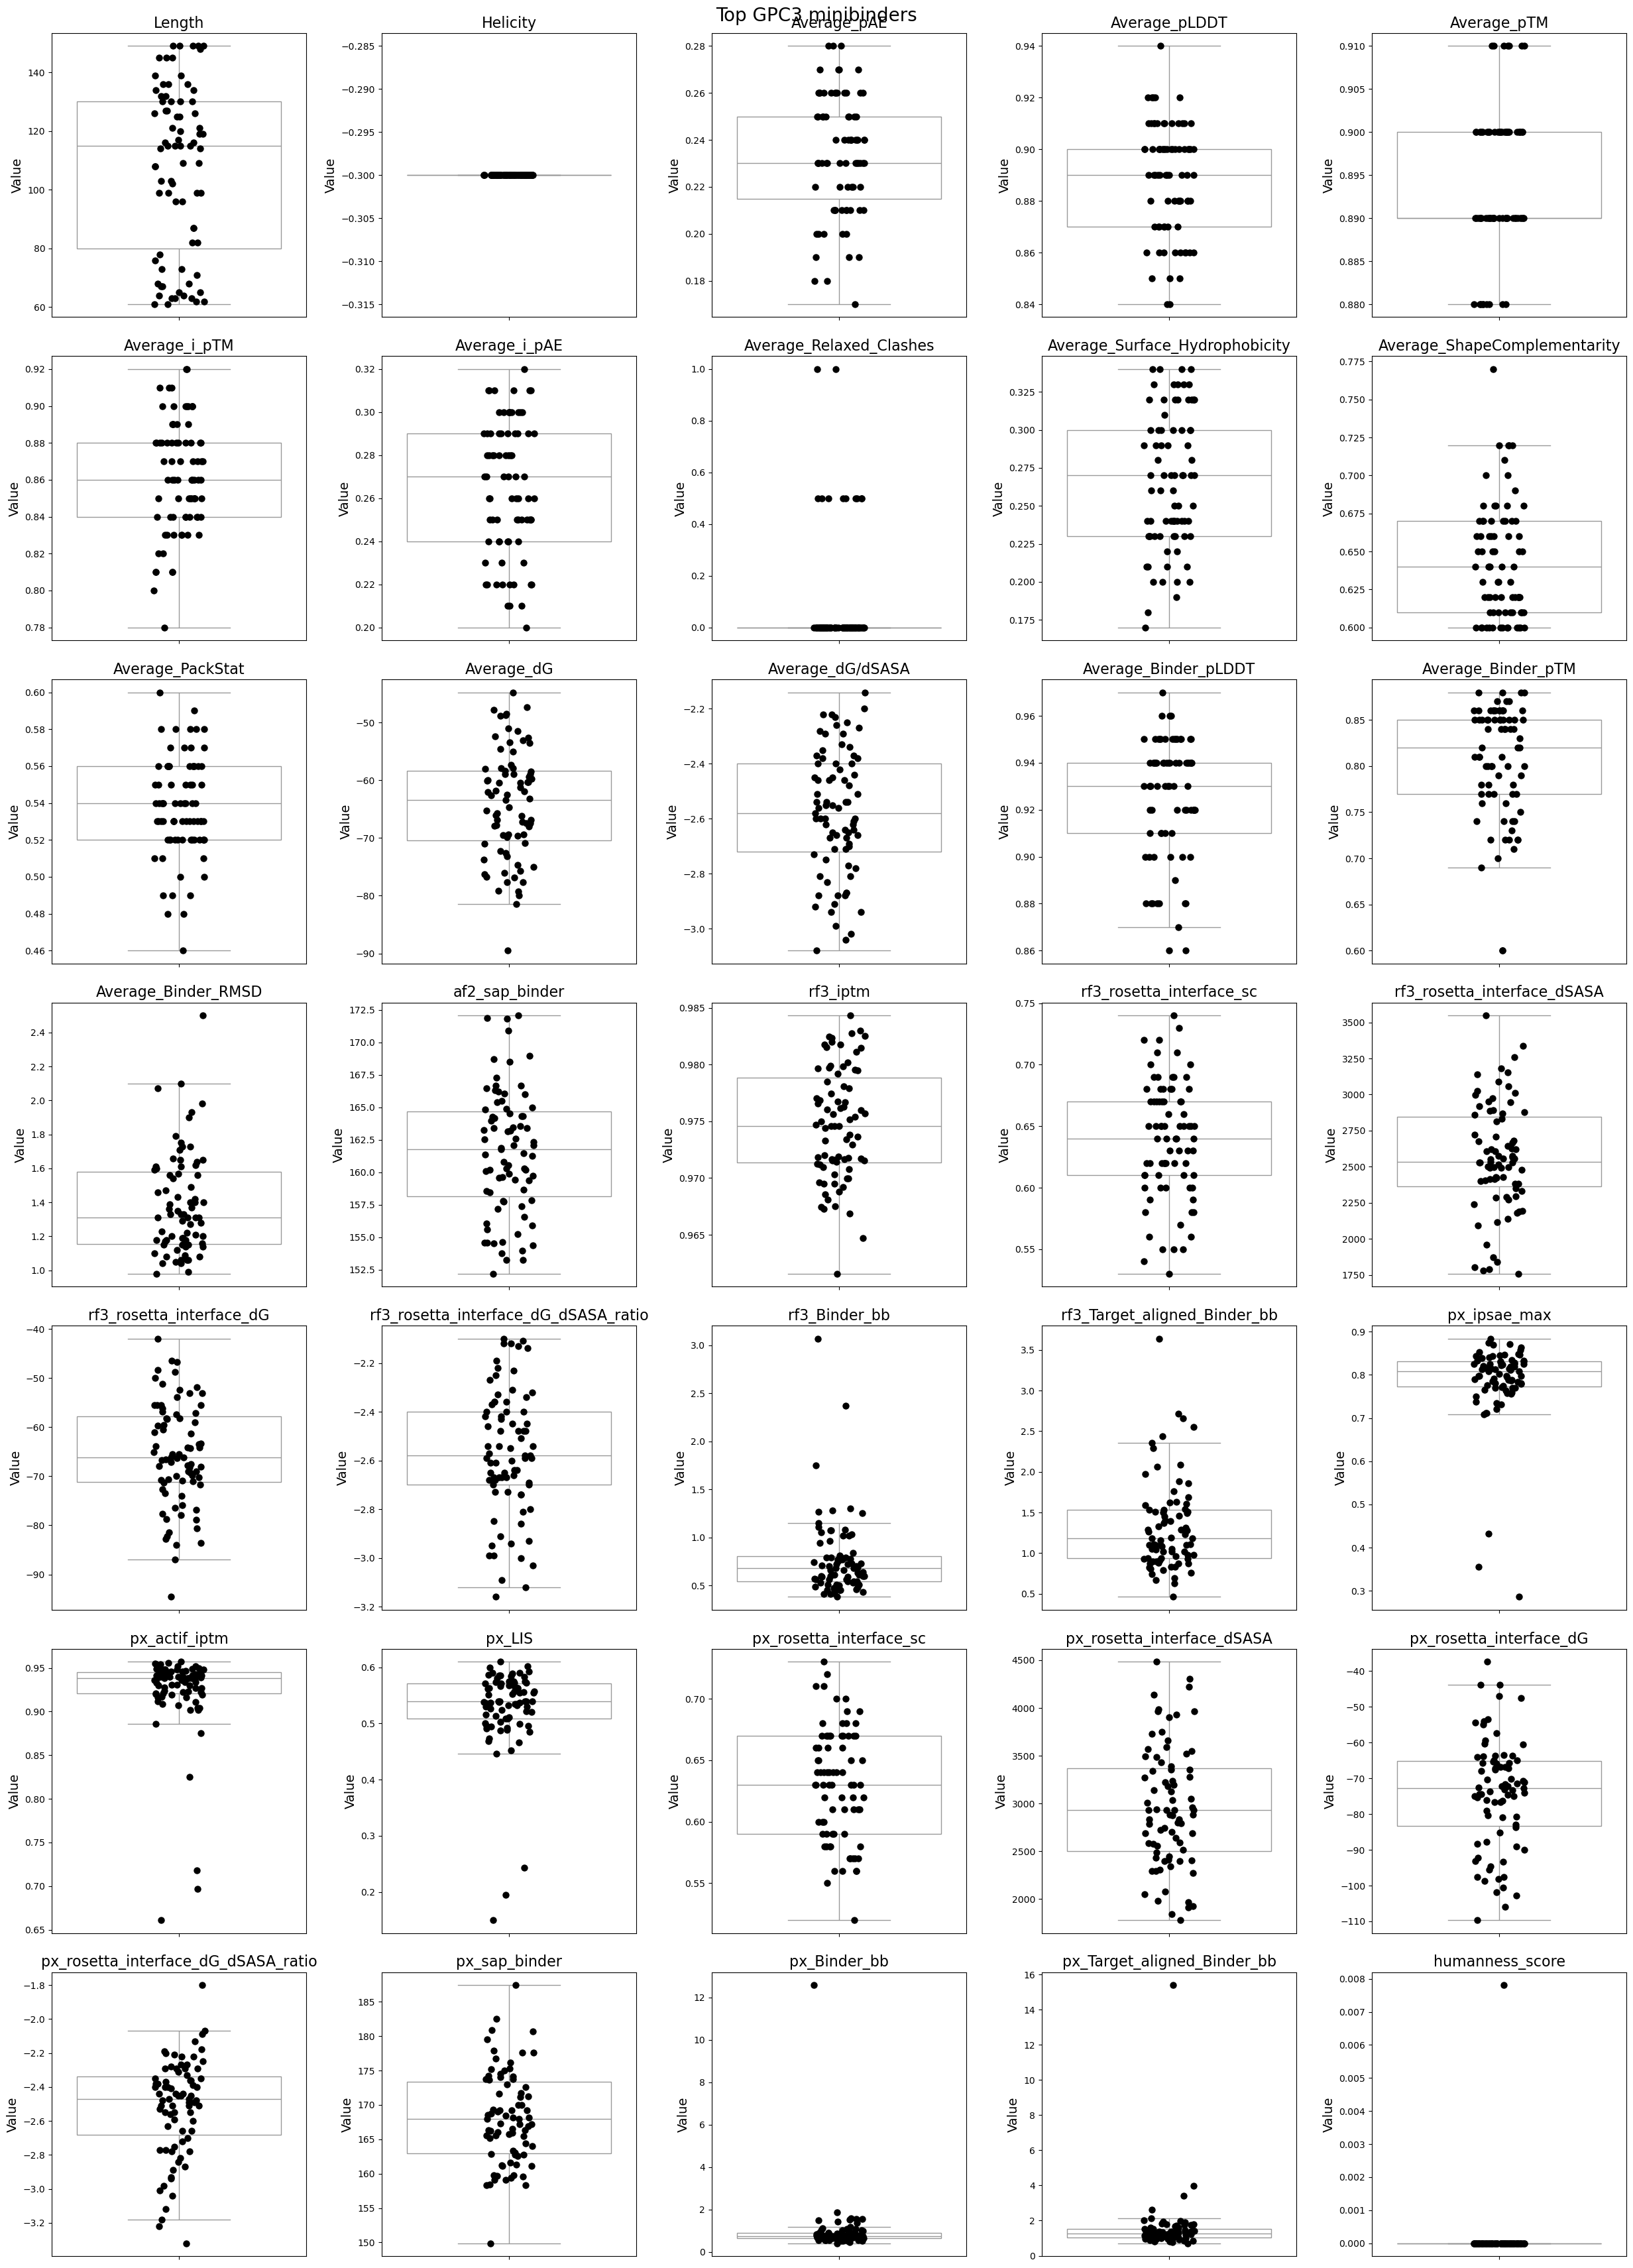

In [3]:
columns_to_plot = [
    'Length',
    'Helicity',
    'Average_pAE',
    'Average_pLDDT',
    'Average_pTM',
    'Average_i_pTM',
    'Average_i_pAE',
    'Average_Relaxed_Clashes',
    'Average_Surface_Hydrophobicity',
    'Average_ShapeComplementarity',
    'Average_PackStat',
    'Average_dG',
    'Average_dG/dSASA',
    'Average_Binder_pLDDT',
    'Average_Binder_pTM',
    'Average_Binder_RMSD',
    'af2_sap_binder',
    'rf3_iptm',
    'rf3_rosetta_interface_sc',
    'rf3_rosetta_interface_dSASA',
    'rf3_rosetta_interface_dG',
    'rf3_rosetta_interface_dG_dSASA_ratio',
    'rf3_Binder_bb',
    'rf3_Target_aligned_Binder_bb',
    'px_ipsae_max',
    'px_actif_iptm',
    'px_LIS',
    'px_rosetta_interface_sc',
    'px_rosetta_interface_dSASA',
    'px_rosetta_interface_dG',
    'px_rosetta_interface_dG_dSASA_ratio',
    'px_sap_binder',
    'px_Binder_bb',
    'px_Target_aligned_Binder_bb',
    'humanness_score'
]

num_cols = 5
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create a violin plot for each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=top_iptm_designs_key_metrics[column], ax=axes[i], color='white', showfliers=False)
    sns.stripplot(y=top_iptm_designs_key_metrics[column], ax=axes[i], color='black', size=7.5, jitter=True, alpha=1)
    axes[i].set_title(column, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value', fontsize=14)

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent subplot titles from overlapping
fig.suptitle('Top GPC3 minibinders', fontsize=20)
plt.tight_layout(pad=2)
plt.savefig('top_iptm_designs_key_metrics_boxplots_minibinders.png', dpi=300)

# PX Sc vs PX ipsae_max

Text(0.5, 1.0, 'Top ipTM designs')

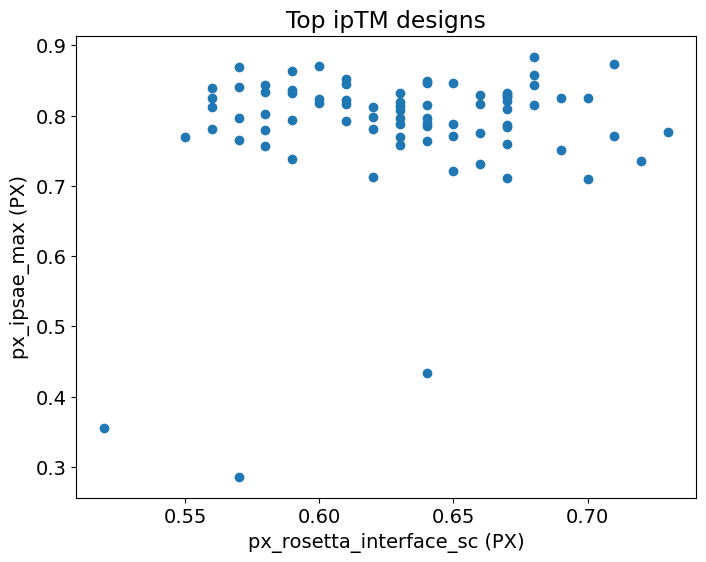

In [16]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('px_rosetta_interface_sc (PX)')
plt.ylabel('px_ipsae_max (PX)')
plt.plot(top_iptm_designs_key_metrics['px_rosetta_interface_sc'], top_iptm_designs_key_metrics['px_ipsae_max'], 'o')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.title('Top ipTM designs')

# PX LIS vs Sc

Text(0.5, 1.0, 'Top ipTM designs')

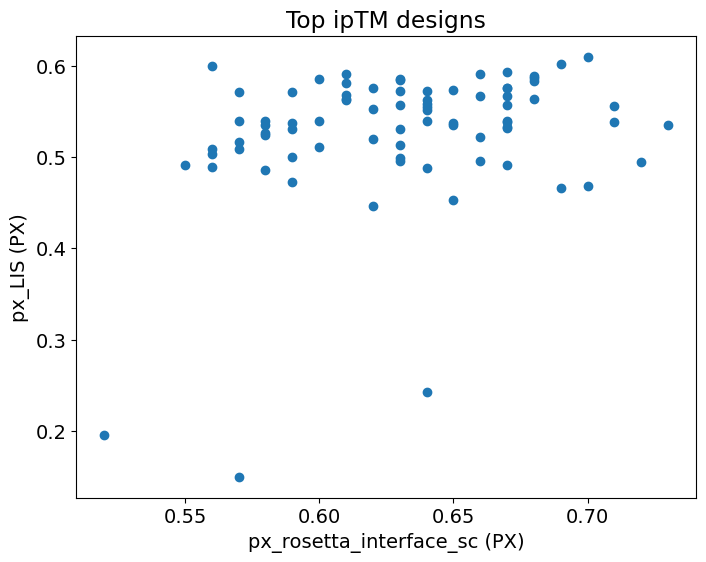

In [15]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('px_rosetta_interface_sc (PX)')
plt.ylabel('px_LIS (PX)')
plt.plot(top_iptm_designs_key_metrics['px_rosetta_interface_sc'], top_iptm_designs_key_metrics['px_LIS'], 'o')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.title('Top ipTM designs')

# PX LIS vs px_ipsae_max

Text(0.5, 1.0, 'Top ipTM designs')

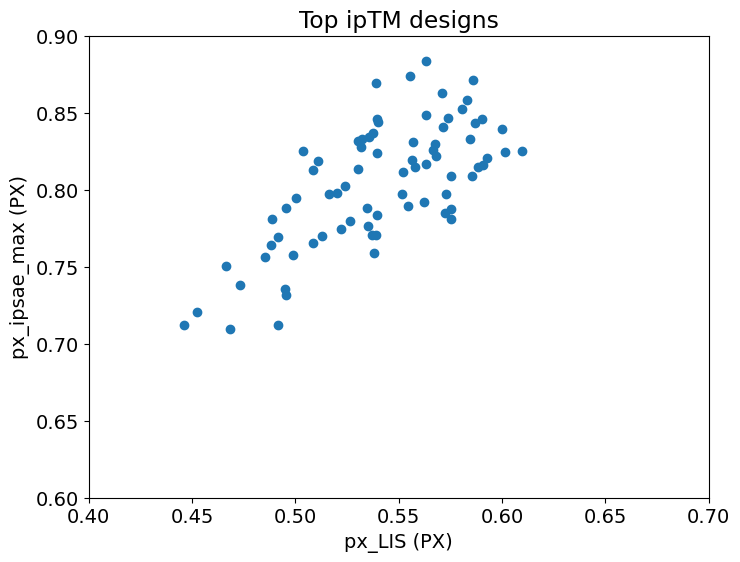

In [14]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('px_LIS (PX)')
plt.ylabel('px_ipsae_max (PX)')
plt.plot(top_iptm_designs_key_metrics['px_LIS'], top_iptm_designs_key_metrics['px_ipsae_max'], 'o')
plt.xlim(0.4,.7)
plt.ylim(0.6,.9)
plt.title('Top ipTM designs')

# PX ipsae_max vs dg/dSASA

Text(0.5, 1.0, 'Top ipTM designs')

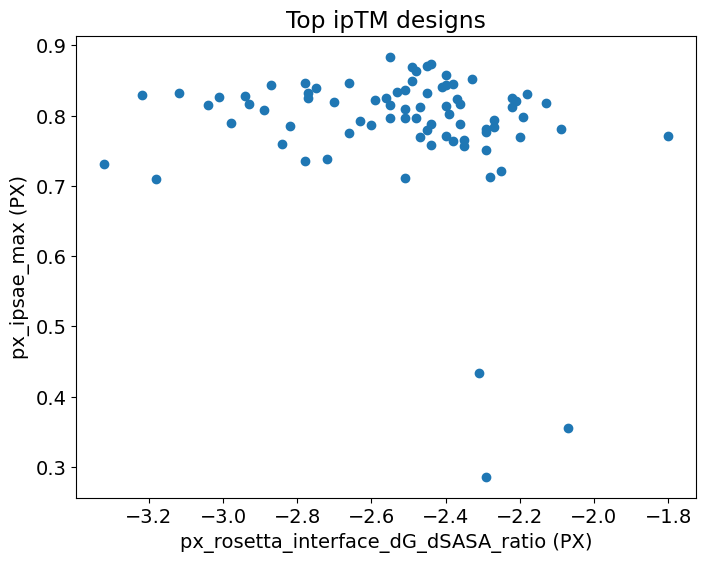

In [13]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('px_rosetta_interface_dG_dSASA_ratio (PX)')
plt.ylabel('px_ipsae_max (PX)')
plt.plot(top_iptm_designs_key_metrics['px_rosetta_interface_dG_dSASA_ratio'], top_iptm_designs_key_metrics['px_ipsae_max'], 'o')
#plt.xlim(0.4,.7)
#plt.ylim(0.6,.9)
plt.title('Top ipTM designs')

# PX RMSD vs AF2 RMSD

Text(0.5, 1.0, 'Top ipTM designs')

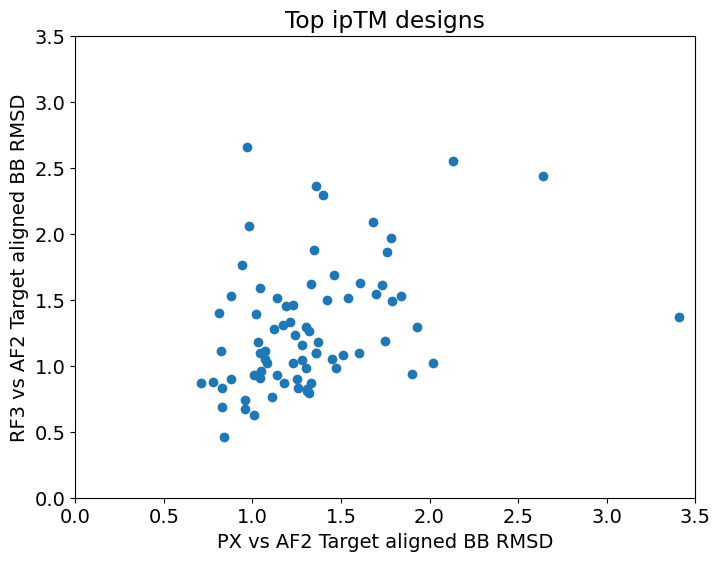

In [21]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('PX vs AF2 Target aligned BB RMSD')
plt.ylabel('RF3 vs AF2 Target aligned BB RMSD')
plt.plot(top_iptm_designs_key_metrics['px_Target_aligned_Binder_bb'], top_iptm_designs_key_metrics['rf3_Target_aligned_Binder_bb'], 'o')
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.title('Top ipTM designs')

## AF2 vs RF3 IPTM

Text(0.5, 1.0, 'Top ipTM designs')

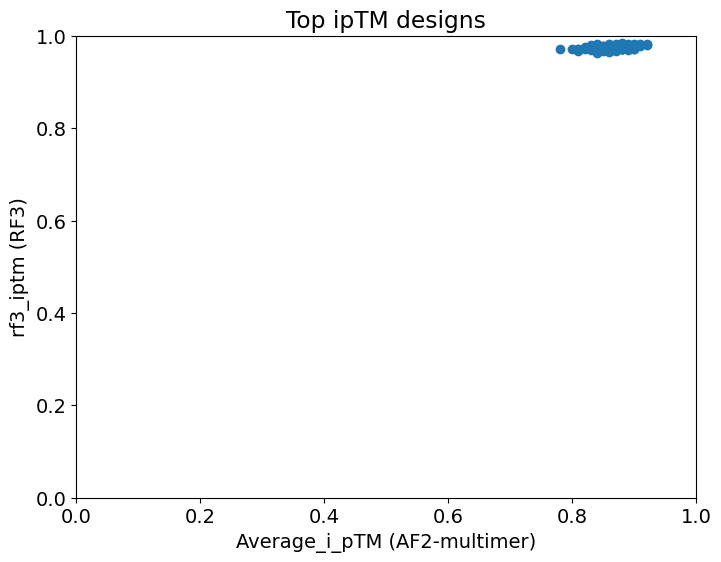

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('Average_i_pTM (AF2-multimer)')
plt.ylabel('rf3_iptm (RF3)')
plt.plot(top_iptm_designs['Average_i_pTM'], top_iptm_designs['rf3_iptm'], 'o')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Top ipTM designs')

## AF2 Sc vs RF3 Sc

Text(0.5, 1.0, 'Top ipTM designs')

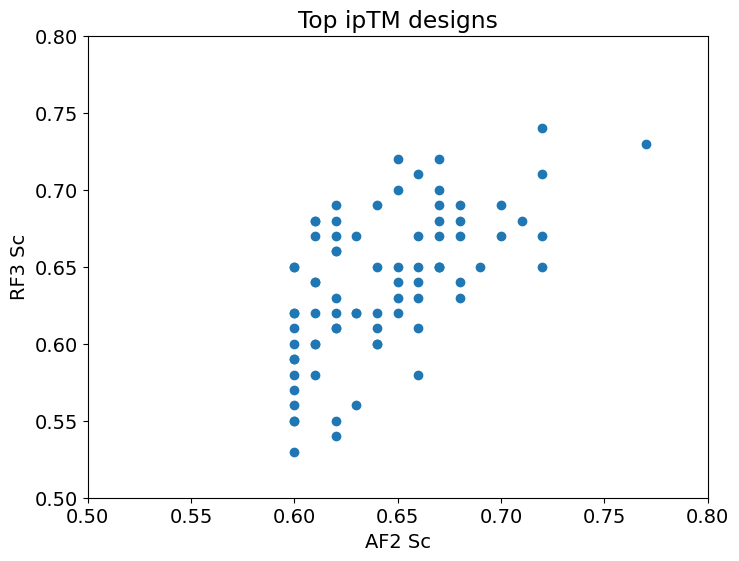

In [32]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('AF2 Sc')
plt.ylabel('RF3 Sc')
plt.plot(top_iptm_designs['Average_ShapeComplementarity'], top_iptm_designs['rf3_rosetta_interface_sc'], 'o')
plt.xlim(0.5,.8)
plt.ylim(0.5,.8)
plt.title('Top ipTM designs')

# AF2 vs RF3 dG/dSASA

Text(0.5, 1.0, 'Top ipTM designs')

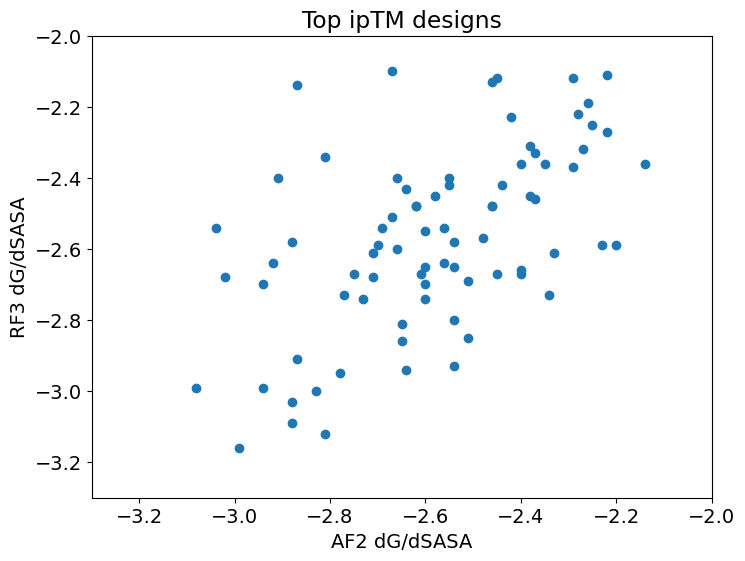

In [35]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('AF2 dG/dSASA')
plt.ylabel('RF3 dG/dSASA')
plt.plot(top_iptm_designs['Average_dG/dSASA'], top_iptm_designs['rf3_rosetta_interface_dG_dSASA_ratio'], 'o')
plt.xlim(-3.3,-2.0)
plt.ylim(-3.3,-2.0)
plt.title('Top ipTM designs')

## AF2 Sc vs dG/dSASA

Text(0.5, 1.0, 'Top ipTM designs')

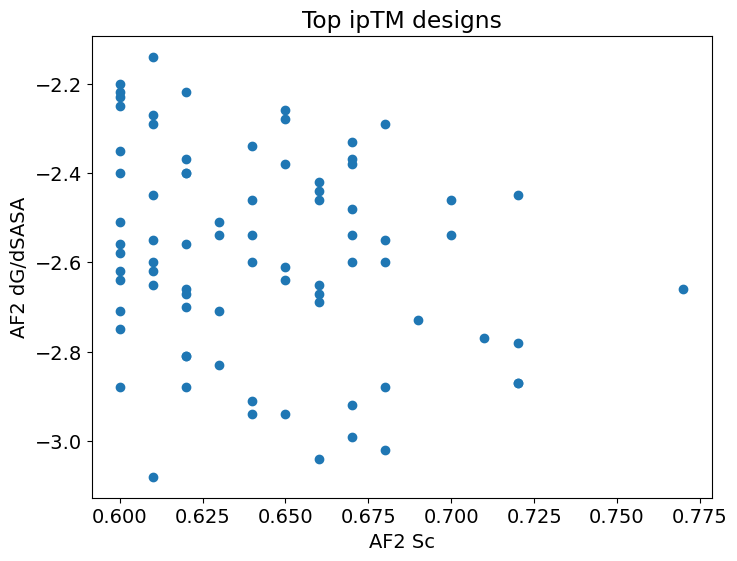

In [37]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('AF2 Sc')
plt.ylabel('AF2 dG/dSASA')
plt.plot(top_iptm_designs['Average_ShapeComplementarity'], top_iptm_designs['Average_dG/dSASA'], 'o')
#plt.xlim(-3.3,-2.0)
#plt.ylim(-3.3,-2.0)
plt.title('Top ipTM designs')

Text(0.5, 1.0, 'Top ipTM designs')

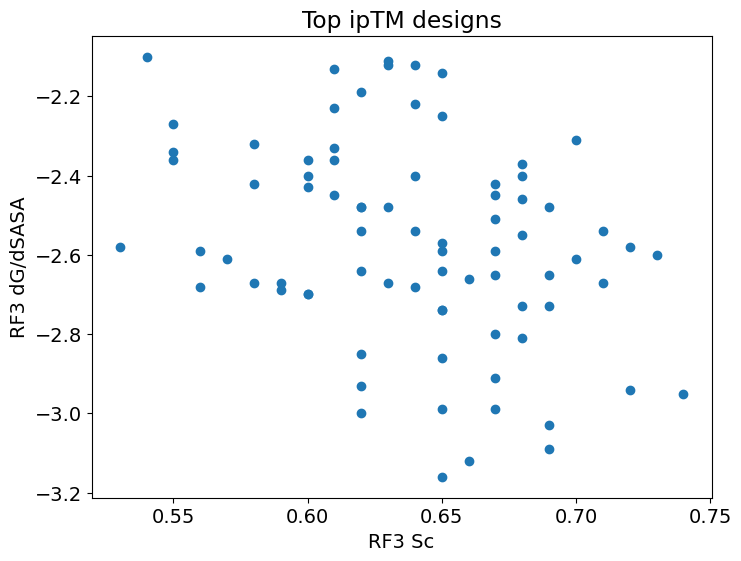

In [38]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
plt.xlabel('RF3 Sc')
plt.ylabel('RF3 dG/dSASA')
plt.plot(top_iptm_designs['rf3_rosetta_interface_sc'], top_iptm_designs['rf3_rosetta_interface_dG_dSASA_ratio'], 'o')
#plt.xlim(-3.3,-2.0)
#plt.ylim(-3.3,-2.0)
plt.title('Top ipTM designs')